In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Set the path to the dataset folder
data_dir = r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\brain_hemo_cnn\hemo_data'

In [22]:
# Load the dataset using ImageDataGenerator
image_size = (128, 128)
batch_size = 32

data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [23]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Set the number of epochs
epochs = 40

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/40
5/5 [==============================] - 4s 534ms/step - loss: 1.5714 - accuracy: 0.5375 - val_loss: 0.6694 - val_accuracy: 0.5938
Epoch 2/40
5/5 [==============================] - 2s 408ms/step - loss: 0.6429 - accuracy: 0.6187 - val_loss: 0.6937 - val_accuracy: 0.6250
Epoch 3/40
5/5 [==============================] - 2s 389ms/step - loss: 0.6126 - accuracy: 0.7125 - val_loss: 0.6872 - val_accuracy: 0.5000
Epoch 4/40
5/5 [==============================] - 2s 386ms/step - loss: 0.5757 - accuracy: 0.7188 - val_loss: 0.7027 - val_accuracy: 0.5625
Epoch 5/40
5/5 [==============================] - 2s 363ms/step - loss: 0.4910 - accuracy: 0.7750 - val_loss: 0.8161 - val_accuracy: 0.4688
Epoch 6/40
5/5 [==============================] - 2s 376ms/step - loss: 0.4004 - accuracy: 0.7875 - val_loss: 0.9454 - val_accuracy: 0.4375
Epoch 7/40
5/5 [==============================] - 2s 377ms/step - loss: 0.3483 - accuracy: 0.8313 - val_loss: 1.1899 - val_accuracy: 0.4375
Epoch 8/40
5/5 [====

In [25]:
# Evaluate the model on the validation set
test_loss, test_accuracy = model.evaluate(val_generator, steps=val_generator.samples // batch_size)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 226ms/step - loss: 3.2396 - accuracy: 0.4375
Test Accuracy: 0.4375


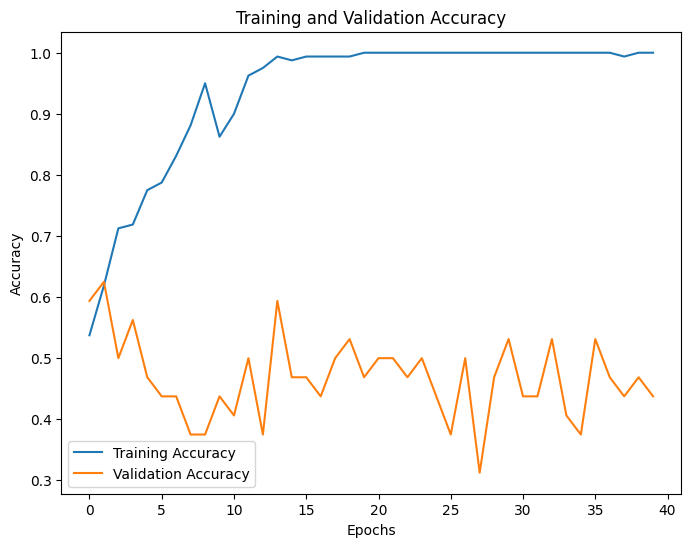

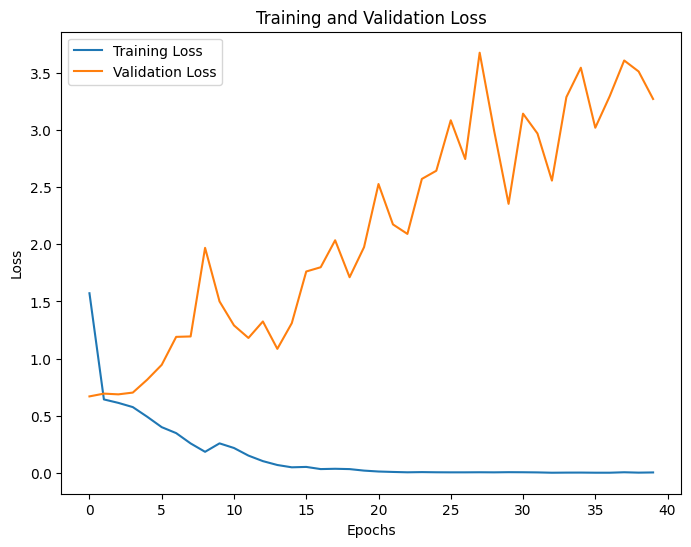

In [26]:
# Plot training and validation accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss curves
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 62ms/step


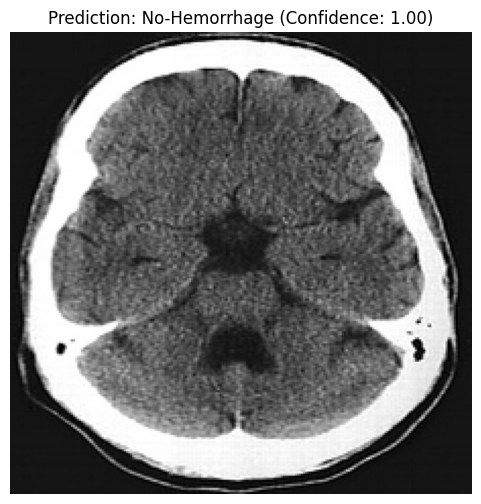

In [38]:
import cv2

# Function to load and preprocess a single image
def preprocess_single_image(image_path, target_size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    return image

# Path to a single image for prediction
image_path = r'C:\Users\rithv\OneDrive\Desktop\cnn_rnn_models\brain_hemo_cnn\hemo_data\no_hemorrhage\132.png'  # Replace with the path to your image

# Preprocess the image
processed_image = preprocess_single_image(image_path, image_size)

# Make a prediction using the trained model
prediction = model.predict(processed_image)[0][0]

# Determine the prediction label and title
if prediction >= 0.5:
    prediction_label = 'No-Hemorrhage'
else:
    prediction_label = 'Hemorrhage'

# Display the image with the prediction result as the title
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {prediction_label} (Confidence: {prediction:.2f})")
plt.axis('off')
plt.show()